#### 蒙塔卡罗：又称随机抽样或统计试验方法，是以概率和统计理论方法为基础的一种统计；
将所求解的问题同一定的概率模型相联系用电子计算机实现统计模拟或抽样，以获得问题的近似解

- 构造或描述概率过程
- 实现从已知概率分布抽样
- 建立各种估计量

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

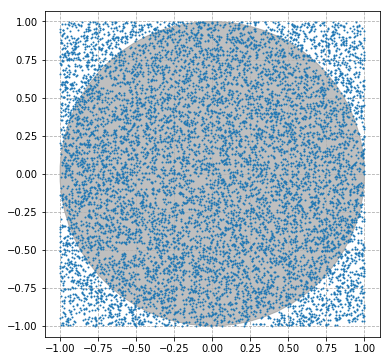

In [17]:
n = 10000

r=1
a,b = (0.0,0.0)

xmin,xmax = a-r,a+r
ymin,ymax = b-r,b+r

x = np.random.uniform(xmin,xmax,n) #均匀分布
y = np.random.uniform(xmin,xmax,n)

fig = plt.figure(figsize=(6,6))
axes = fig.add_subplot(1,1,1)

plt.plot(x,y,'o',markersize = 1)
plt.axis('equal')

d = np.sqrt((x-a)**2 + (y-b)**2) #任一点到圆心的距离，勾股定理
res = sum(np.where(d<r,1,0)) #d的距离小于1的所有点数

pi = 4 * res / n
pi

#画圆形
from matplotlib.patches import Circle
circle = Circle(xy = (a,b),radius=r,alpha=0.5,color='gray')
axes.add_patch(circle)
plt.grid(True,linestyle='--',linewidth='0.8')

#### 厕所排队问题
- 会有20个人同时上厕所
- 这20个人会在0到10分钟之内全部到达厕所
- 每个人上厕所在1-3分钟之内

首先模拟最简单的情况，即一个厕所，
考虑参数：到达时间/等待时间/开始上厕所时间/结束时间


第一个人时间情况
0.02113822476294991 0.02113822476294991 2.984341368929117 3.0054795936920673
_________
第1个人：到达时间 开始时间 ‘工作时间’ 完成时间  等待时间
 0.11387976669737676 3.0054795936920673 1.0678626376832185 4.073342231375285 2.8915998269946908 

第2个人：到达时间 开始时间 ‘工作时间’ 完成时间  等待时间
 0.8062589010149235 4.073342231375285 1.7289443760964198 5.802286607471705 3.2670833303603617 

第3个人：到达时间 开始时间 ‘工作时间’ 完成时间  等待时间
 1.5042610126843692 5.802286607471705 1.0157663801269075 6.8180529875986124 4.298025594787337 

第4个人：到达时间 开始时间 ‘工作时间’ 完成时间  等待时间
 1.7583215183666767 6.8180529875986124 1.6763275254525425 8.494380513051155 5.059731469231936 

第5个人：到达时间 开始时间 ‘工作时间’ 完成时间  等待时间
 2.582908637153958 8.494380513051155 1.0098581544923417 9.504238667543497 5.911471875897197 

第6个人：到达时间 开始时间 ‘工作时间’ 完成时间  等待时间
 2.6287411050190412 9.504238667543497 2.0455079410602277 11.549746608603725 6.875497562524456 

第7个人：到达时间 开始时间 ‘工作时间’ 完成时间  等待时间
 2.943477680826728 11.549746608603725 1.3865875936086927 12.936334202212418 8.606268927776997 

第

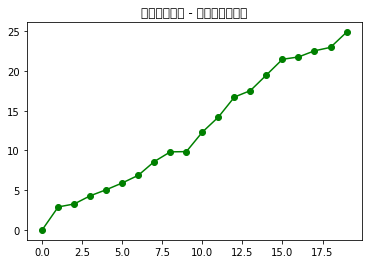

In [27]:
arrivingtime = np.random.uniform(0,10,size=20)
arrivingtime.sort()
workingtime = np.random.uniform(1,3,size=20)

startingtime = [0 for i in range(20)]
finishtime =  [0 for i in range(20)]
waitingtime =  [0 for i in range(20)]
emptytime =  [0 for i in range(20)] 
#开始时间都是0

startingtime[0] = arrivingtime[0]
finishtime[0] = startingtime[0] + workingtime[0]
waitingtime[0] = startingtime[0] - arrivingtime[0]

print('第一个人时间情况')
print(arrivingtime[0],startingtime[0],workingtime[0],finishtime[0])
print('_________')

for i in range(1,len(arrivingtime)):
    if finishtime[i-1]> arrivingtime[i]:
        startingtime[i] = finishtime[i-1]
    else:
        startingtime[i] = arrivingtime[i]
        emptytime[i] = arrivingtime[i] - finishtime[i-1]
        
    finishtime[i] = startingtime[i] + workingtime[i]
    waitingtime[i] = startingtime[i] - arrivingtime[i]
    
    print('第%i个人：到达时间 开始时间 ‘工作时间’ 完成时间  等待时间\n'%i,
         arrivingtime[i],
         startingtime[i],
         workingtime[i],
         finishtime[i],
         waitingtime[i],
          '\n')
    
    
fig = plt.figure(figsize=(6,4))
plt.plot(waitingtime,'-go')
plt.title('蒙特卡洛模拟 - 排队上测速问题')
plt.show()